In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns
plt.style.use("fivethirtyeight")

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/travel-times.csv', parse_dates=[['Date', 'StartTime']], index_col='Date_StartTime')

In [6]:
df.head()

,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date_StartTime,,,,,,,,,,,
2012-01-06 16:37:00,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06 08:20:00,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04 16:17:00,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04 07:53:00,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03 18:57:00,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2012-01-06 16:37:00 to 2011-07-11 16:56:00
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DayOfWeek       205 non-null    object 
 1   GoingTo         205 non-null    object 
 2   Distance        205 non-null    float64
 3   MaxSpeed        205 non-null    float64
 4   AvgSpeed        205 non-null    float64
 5   AvgMovingSpeed  205 non-null    float64
 6   FuelEconomy     188 non-null    object 
 7   TotalTime       205 non-null    float64
 8   MovingTime      205 non-null    float64
 9   Take407All      205 non-null    object 
 10  Comments        24 non-null     object 
dtypes: float64(6), object(5)
memory usage: 19.2+ KB


In [ ]:
df.describe()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


In [7]:
mask = np.random.choice([True, False], size=df['MaxSpeed'].shape, p=[0.1, 0.9])
mask[mask.all(),-1] = 0
df['MaxSpeed'] = df['MaxSpeed'].mask(mask)

In [8]:
df.head()

,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date_StartTime,,,,,,,,,,,
2012-01-06 16:37:00,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06 08:20:00,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04 16:17:00,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04 07:53:00,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03 18:57:00,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [9]:
df.isnull().sum()

DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed           21
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [10]:
df.isnull().mean()*100

DayOfWeek          0.000000
GoingTo            0.000000
Distance           0.000000
MaxSpeed          10.243902
AvgSpeed           0.000000
AvgMovingSpeed     0.000000
FuelEconomy        8.292683
TotalTime          0.000000
MovingTime         0.000000
Take407All         0.000000
Comments          88.292683
dtype: float64

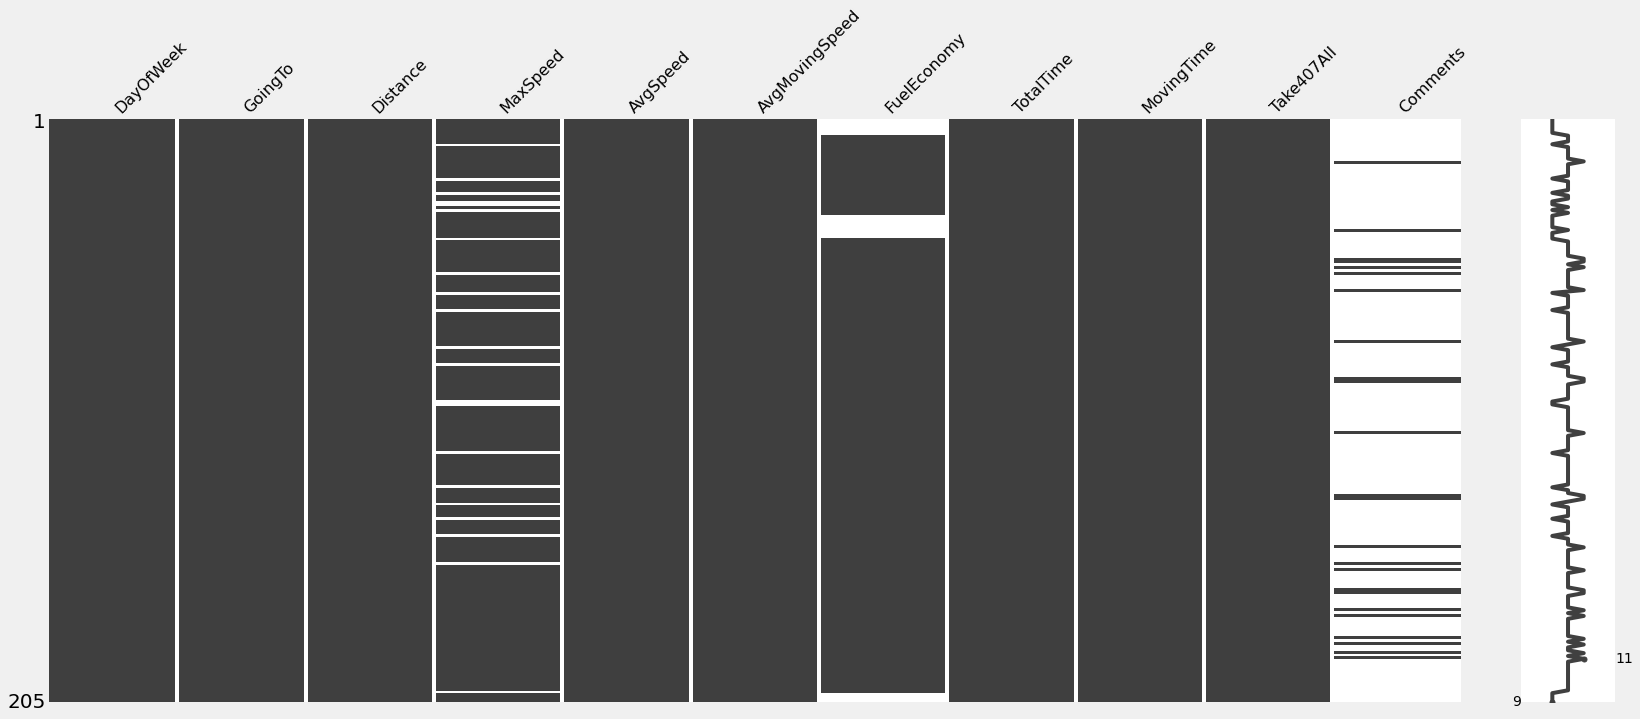

In [11]:
msno.matrix(df)

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
# Mean Imputation

df_mean = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
df_mean['MaxSpeed'] = mean_imputer.fit_transform(df_mean['MaxSpeed'].values.reshape(-1,1))

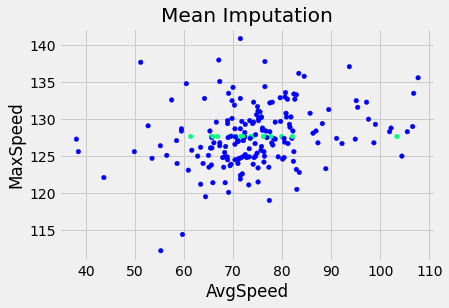

In [14]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull() 
fig = df_mean.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

In [15]:
# Mode Imputation

df_mode = df.copy(deep=True)
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode['MaxSpeed'] = mode_imputer.fit_transform(df_mode['MaxSpeed'].values.reshape(-1,1))

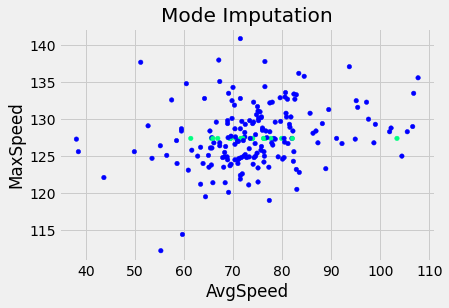

In [16]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull() 
fig = df_mode.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', colorbar=False, title='Mode Imputation')

In [17]:
# Time Series Imputation

df['MaxSpeed'][-50:-40]

Date_StartTime
2011-08-19 17:42:00    126.5
2011-08-19 07:05:00      NaN
2011-08-18 17:05:00    129.6
2011-08-18 08:11:00    137.7
2011-08-17 17:17:00    129.8
2011-08-17 08:10:00    124.8
2011-08-16 17:27:00    133.4
2011-08-16 08:15:00    131.7
2011-08-15 17:38:00    132.3
2011-08-15 08:15:00    124.7
Name: MaxSpeed, dtype: float64

In [18]:
# Ffill method to replace nans with the last observed value

df['MaxSpeed'].fillna(method='ffill')[-50:-40]

Date_StartTime
2011-08-19 17:42:00    126.5
2011-08-19 07:05:00    126.5
2011-08-18 17:05:00    129.6
2011-08-18 08:11:00    137.7
2011-08-17 17:17:00    129.8
2011-08-17 08:10:00    124.8
2011-08-16 17:27:00    133.4
2011-08-16 08:15:00    131.7
2011-08-15 17:38:00    132.3
2011-08-15 08:15:00    124.7
Name: MaxSpeed, dtype: float64

In [19]:
# Bfill method to replace nans with the next observed value

df['MaxSpeed'].fillna(method='bfill')[-50:-40]

Date_StartTime
2011-08-19 17:42:00    126.5
2011-08-19 07:05:00    129.6
2011-08-18 17:05:00    129.6
2011-08-18 08:11:00    137.7
2011-08-17 17:17:00    129.8
2011-08-17 08:10:00    124.8
2011-08-16 17:27:00    133.4
2011-08-16 08:15:00    131.7
2011-08-15 17:38:00    132.3
2011-08-15 08:15:00    124.7
Name: MaxSpeed, dtype: float64

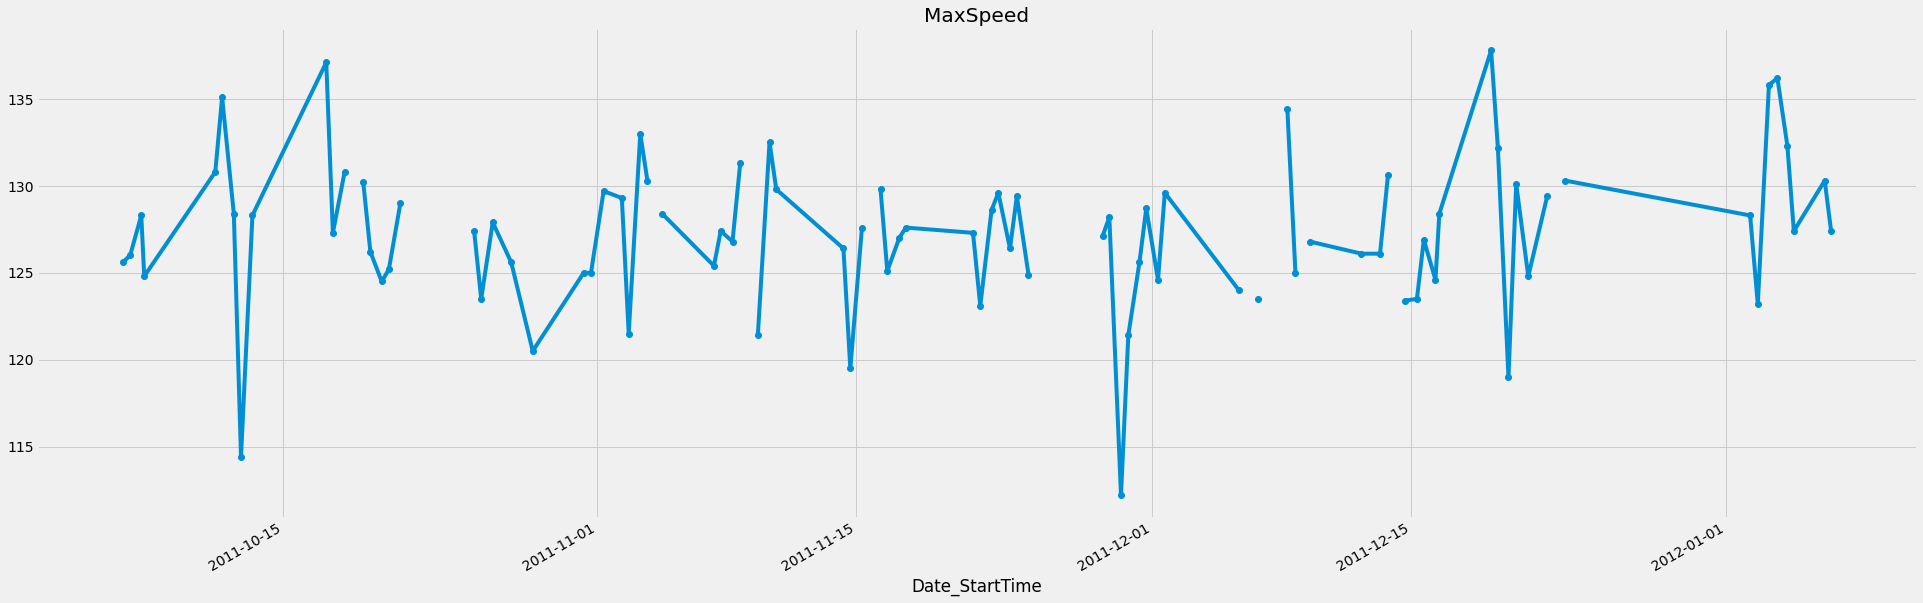

In [20]:
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o", figsize=(30,10))

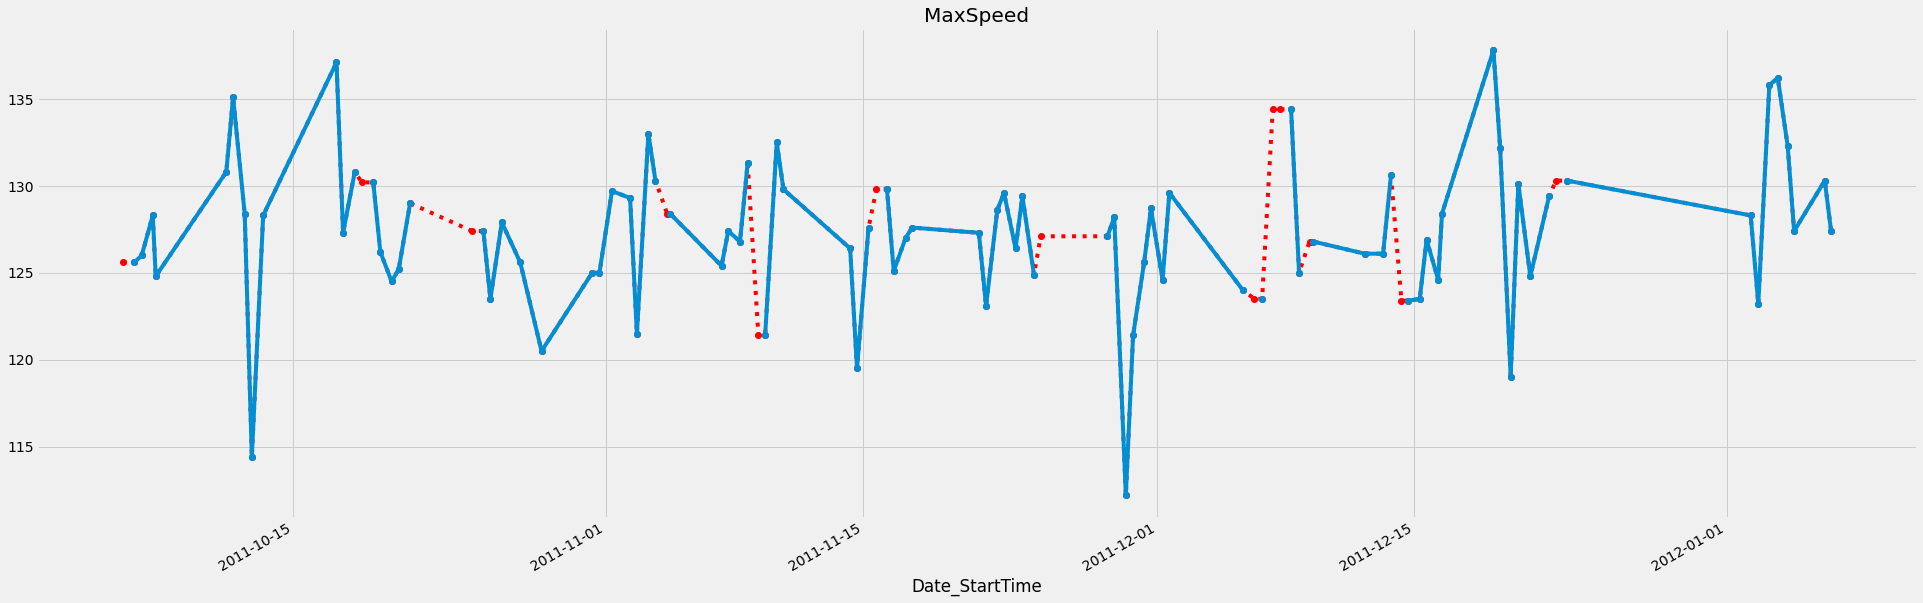

In [21]:
# Ffill imputation
ffill_imp = df.fillna(method="ffill")
ffill_imp["MaxSpeed"][:100].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o")

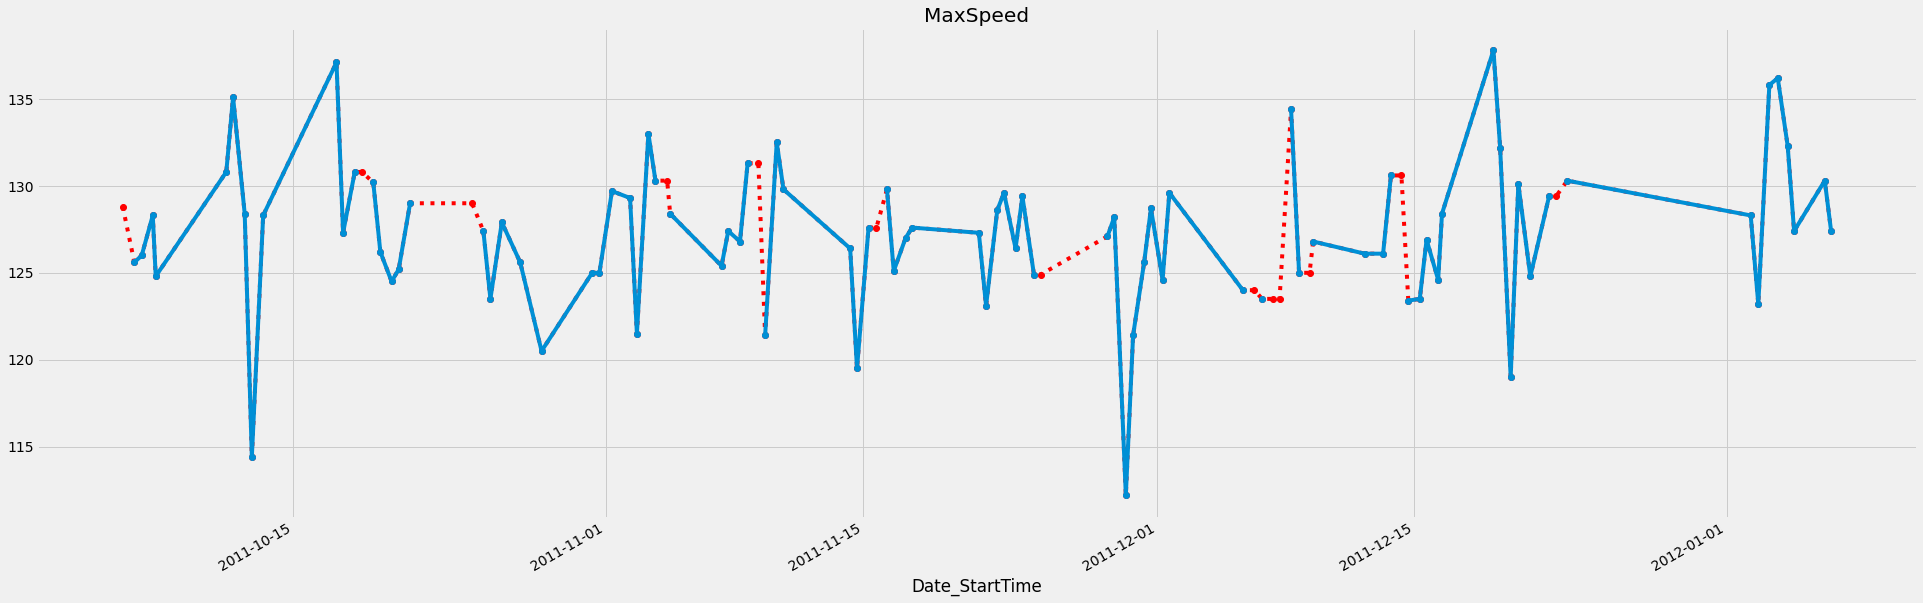

In [22]:
# Bfill imputation
bfill_imp = df.fillna(method="bfill")
bfill_imp["MaxSpeed"][:100].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o")

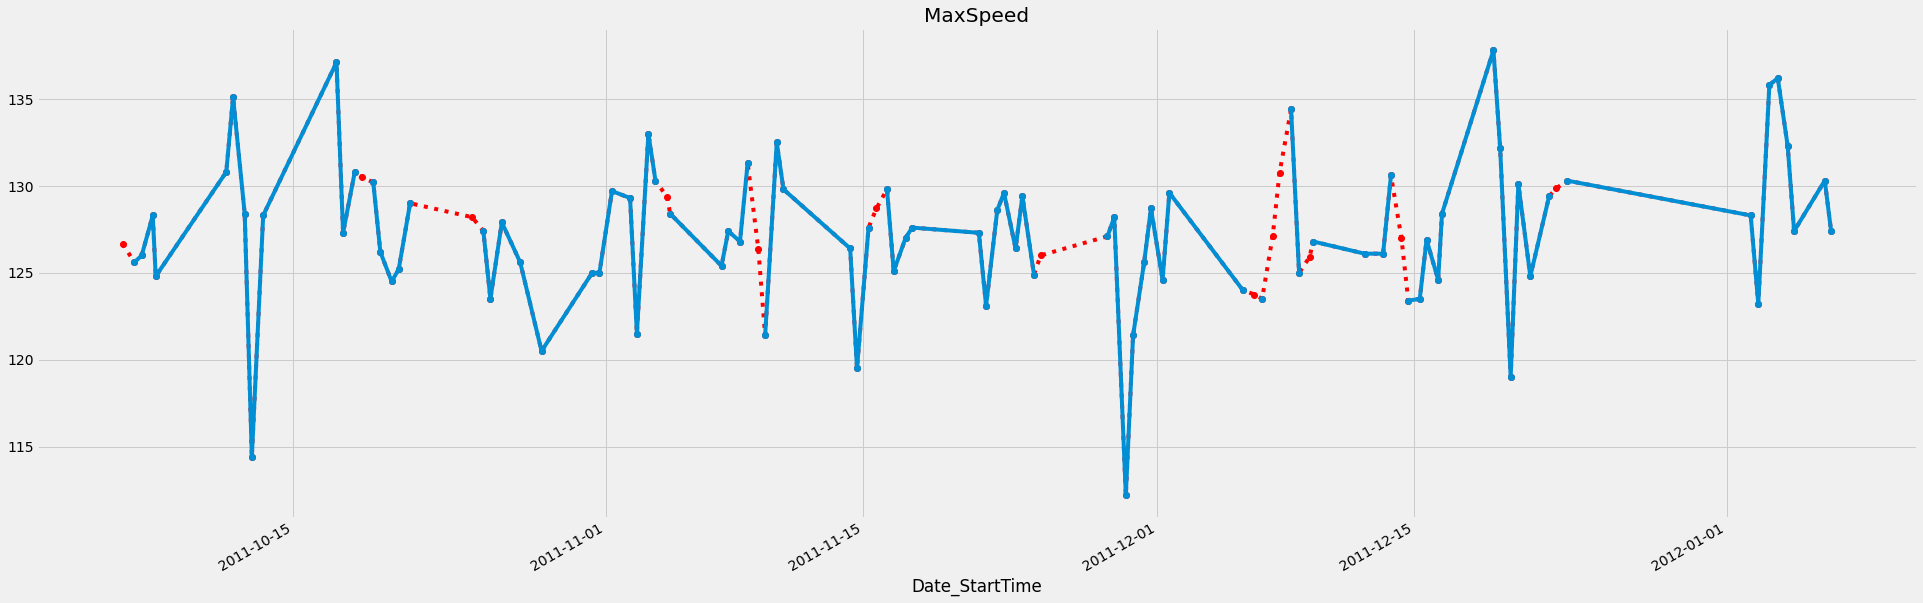

In [23]:
# Linear Interpolation imputation
linear_int = df.interpolate(method="linear")
linear_int["MaxSpeed"][:100].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o")

In [24]:
# Advanced Techniques

# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

df_knn = df.filter(['Distance',	'MaxSpeed',	'AvgSpeed',	'AvgMovingSpeed'], axis=1).copy()

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

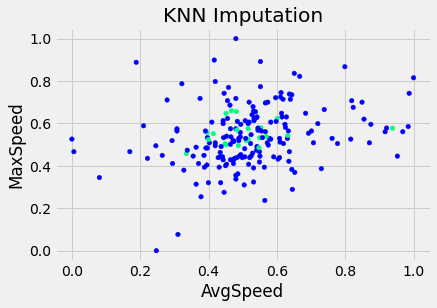

In [25]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull() 
fig = df_knn_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

In [26]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['Distance',	'MaxSpeed',	'AvgSpeed',	'AvgMovingSpeed'], axis=1).copy()

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

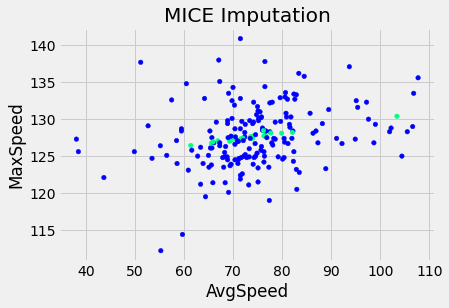

In [27]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull() 
fig = df_mice_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)